# Unsupervised Learning & KMeans Clustering

This notebook demonstrates the use of KMeans clustering—an unsupervised learning technique—to discover inherent groupings in the Breast Cancer dataset. We then compare the clustering assignments with the known labels to assess the algorithm's ability to recover meaningful groups.

In this notebook, we cover:

1. **Overview of Unsupervised Learning & KMeans**  
   - Introduction to clustering when there is no response variable.
   - Explanation of how KMeans partitions data into k clusters by minimizing within-cluster variance.
   
2. **Data Preprocessing**  
   - Loading the Breast Cancer dataset.
   - Centering and scaling the features, which is crucial for KMeans performance.

3. **KMeans Clustering Computation and Visualization**  
   - Running KMeans on the standardized data.
   - Visualizing the clustering results in 2D using PCA for dimensionality reduction.
   - Comparing the cluster assignments with the true labels (benign vs. malignant).

4. **Evaluation and Discussion**  
   - Assessing clustering performance with metrics (e.g., Adjusted Rand Index).
   - Discussing the insights and potential limitations.

In [23]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Step 1: Load and Preprocess the Data

We begin by loading the Breast Cancer dataset.
- The Breast Cancer dataset contains measurements for benign and malignant tumors.
- Here, the dataset provides:
    - `X` as a feature matrix
    - `y` as a target variable

In [24]:
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer Wisconsin dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data  # Feature matrix
y = breast_cancer.target  # Target variable (diagnosis)
feature_names = breast_cancer.feature_names
target_names = breast_cancer.target_names

print(y)
pd.DataFrame(X, columns = [feature_names])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Scaling is critical here because KMeans relies on distance calculations and can be biased by the scale of features.

In [25]:
from sklearn.preprocessing import StandardScaler

# It is important to center and scale the features since PCA is sensitive to the variable scales.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

## Step 2: Compute KMeans Clustering
KMeans clustering partitions the data into k clusters by iteratively assigning points to the nearest cluster centroid and then updating the centroids based on the cluster’s mean.

Key Concepts:
- Initialization: Randomly select k centroids.

- Assignment & Update: Reassign points and recalculate centroids until convergence.

- Choosing k: For the Breast Cancer dataset (with two known classes), we set k = 2.

In [34]:
from sklearn.cluster import KMeans

# Set the number of clusters to 2, as we have two classes (malignant and benign)
k = 10
kmeans = KMeans(n_clusters = k, random_state = 42)
clusters = kmeans.fit_predict(X_std)

# Output the centroids and first few cluster assignments
clusters[:15]

c:\Users\joyce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([7, 4, 7, 8, 4, 8, 4, 1, 8, 8, 9, 1, 7, 9, 8])

## Step 3: Visualization of KMeans Clustering Results
Visualization helps us understand how well KMeans has partitioned the data. However, our dataset is high-dimensional, so we first reduce it to 2 dimensions using PCA for visualization. We then plot the PCA scores with colors corresponding to the cluster assignments.

### 3a. 2D Scatter Plot of Clustering Results Using PCA

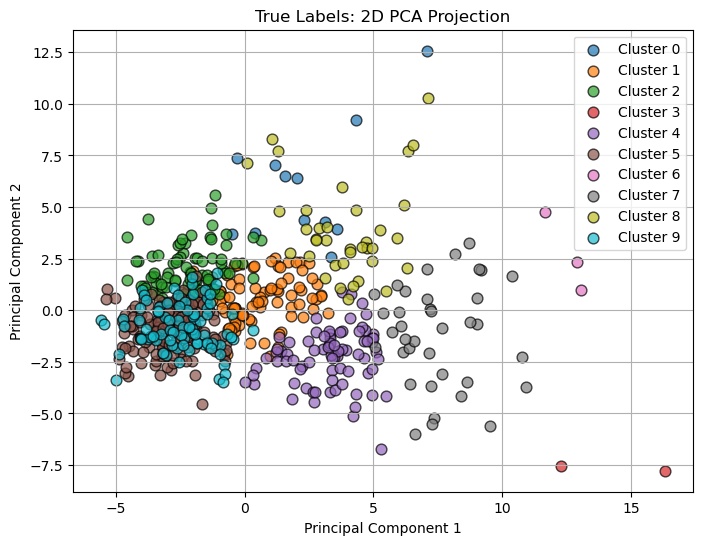

In [35]:
from sklearn.decomposition import PCA

# Reduce the data to 2 dimensions for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# For comparison, visualize true labels using PCA (same 2D projection)
plt.figure(figsize=(8, 6))
# Iterate over unique cluster labels
for cluster_label in np.unique(clusters):
    # Get indices of data points belonging to the current cluster
    indices = np.where(clusters == cluster_label)
    # Scatter plot for the current cluster using the corresponding color
    # and using the cluster_label as the legend label
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1],
                alpha=0.7, edgecolor='k', s=60, label=f'Cluster {cluster_label}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('True Labels: 2D PCA Projection')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### 3b. Comparing Clusters with True Labels
Even though KMeans is unsupervised, we can compare its cluster assignments with the actual labels to gauge performance.

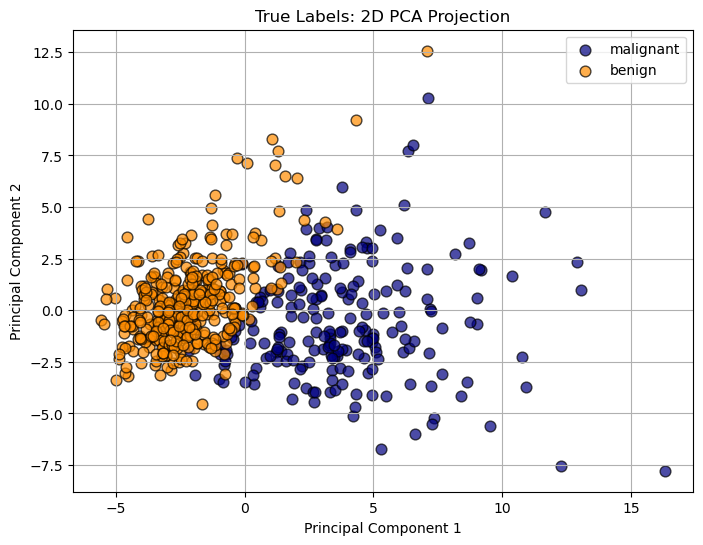

In [28]:
# For comparison, visualize true labels using PCA (same 2D projection)
plt.figure(figsize=(8, 6))
colors = ['navy', 'darkorange']
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                color=colors[i], alpha=0.7, edgecolor='k', s=60, label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('True Labels: 2D PCA Projection')
plt.legend(loc='best')
plt.grid(True)
plt.show()



---



## Step 4: Evaluation and Discussion
Although KMeans clustering is unsupervised, we can assess how well the clusters match the true labels.
- There are other metrics like Adjusted Rand Index (ARI) that are also used to evaluate clusters to true values.

In [29]:
from sklearn.metrics import accuracy_score, classification_report
# Since KMeans labels are arbitrary (e.g., 0 and 1) and may not match the true labels directly,
# we compute accuracy for both the original labels and their complement, and choose the higher value.
accuracy_score(y, clusters)
print(classification_report(y, clusters))

              precision    recall  f1-score   support

           0       0.08      0.00      0.01       212
           1       0.48      0.11      0.18       357
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.07       569
   macro avg       0.06      0.01      0.02       569
weighted avg       0.33      0.07      0.12       569



c:\Users\joyce\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\joyce\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\joyce\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Step 5: Evaluating the Best Number of Clusters
Determining the optimal number of clusters is a common challenge in clustering applications. Two popular methods to address this are:

- Elbow Method:
We plot the Within-Cluster Sum of Squares (WCSS) against different values of k. The "elbow" point—where the rate of decrease sharply changes—suggests an optimal value for k.

- Silhouette Score:
This score quantifies how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better clustering. We compute the average silhouette score for different values of k and select the one with the highest score.

In [30]:
from sklearn.metrics import silhouette_score

# Define the range of k values to try
ks = range(2,11)
# starting from 2 clusters to 10 clusters
wcss = []
silhouette_scores = []

# Within-Cluster Sum of Squares for each k
# Silhouette scores for each k
for k in ks:
    km = KMeans(k, random_state = 42)
    km.fit(X_std)
    wcss.append(km.inertia_)
    labels = km.labels_
    silhouette_scores.append(silhouette_score(X_std, labels))

# Loop over the range of k values
print(wcss)
print(silhouette_scores)

c:\Users\joyce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\joyce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\joyce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\joyce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[11595.683312822137, 10066.281842533348, 9266.15423578978, 9263.404816345357, 8562.878816973254, 8016.368826653422, 7288.475099597567, 7040.992779468627, 6668.853779565721]
[0.3447344346611054, 0.3151862330494096, 0.274157742034422, 0.16454819399495385, 0.1450578794997139, 0.1469508140067517, 0.16185657051384186, 0.1439495585582379, 0.14706722381698448]


c:\Users\joyce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Plot the Results Above

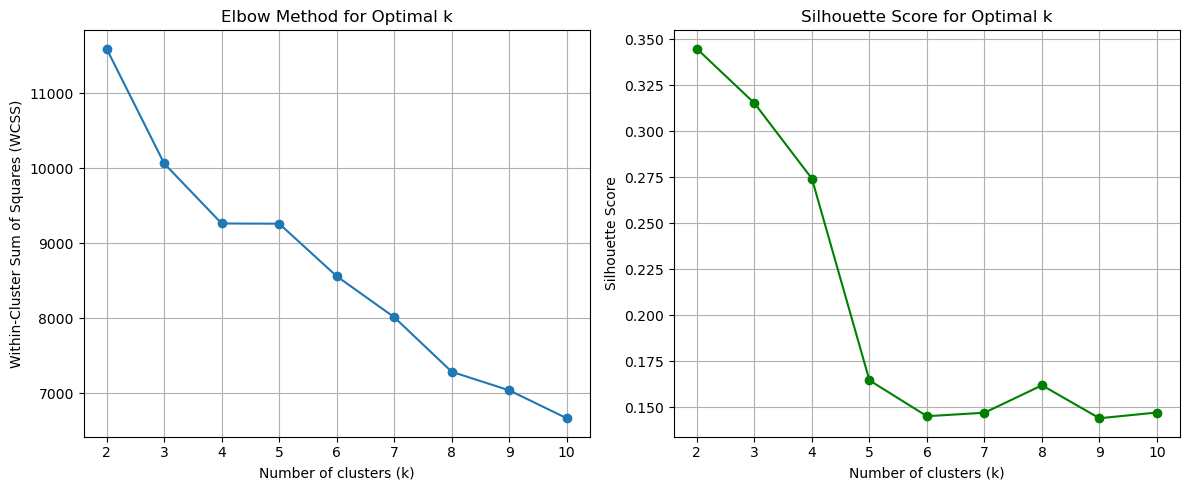

In [31]:
# Plot the Elbow Method result
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(ks, wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

# Plot the Silhouette Score result
plt.subplot(1, 2, 2)
plt.plot(ks, silhouette_scores, marker='o', color='green')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True)

plt.tight_layout()
plt.show()